In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving loandata.csv to loandata.csv


In [ ]:
import pandas as pd

In [ ]:
loan_data = pd.read_csv('loandata.csv')

In [ ]:
loan_data.shape

(614, 13)

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
loan_data['Gender'] = loan_data['Gender'].fillna(loan_data['Gender'].mode()[0])

In [ ]:
loan_data['Married'] = loan_data['Married'].fillna(loan_data['Married'].mode()[0])

In [ ]:
loan_data['Dependents'] = loan_data['Dependents'].str.replace('+', '')

In [ ]:
loan_data['Dependents'] = loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0])

In [ ]:
loan_data['Dependents'] = loan_data['Dependents'].astype(int)

In [ ]:
loan_data['Self_Employed'] = loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0])

In [ ]:
loan_data['LoanAmount'] = loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean()).round(2)

In [ ]:
loan_data['Loan_Amount_Term'] =loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mean()).round(2)

In [ ]:
loan_data['Credit_History'] = loan_data['Credit_History'].fillna(loan_data['Credit_History'].median())

In [ ]:
loan_data = loan_data.drop(columns='Loan_ID')

In [ ]:
loan_data['Loan_Status'] = loan_data['Loan_Status'].map({'Y': 1, 'N': 0})

In [ ]:
categorical_cols = loan_data.select_dtypes(include='object').columns

In [ ]:
loan_data = pd.get_dummies(loan_data, columns=categorical_cols, drop_first=True)

In [ ]:
loan_data = loan_data.apply(
    lambda col: col.astype(int) if col.dropna().isin([0, 1]).all() else col
)

 Gender, education, and self-employment columns that had missing values were filled in using mode.

Change "3+" to 3 in the Dependents column, then convert to int and use mode to fill in the missing values.

The loan amount and loan amount term columns' missing values were filled in using the mean.

Used the median to fill in the missing value in the credit history column.

The loan Id column was dropped, and the category column dtypes were changed to numerical.

## EDA

In [ ]:
loan_data.groupby('Married_Yes	')['Loan_Status'].value_counts(normalize=True)

Credit_History  Loan_Status
0               0              0.921348
                1              0.078652
1               1              0.790476
                0              0.209524
Name: proportion, dtype: float64

In [ ]:
loan_data.groupby('Married_Yes')['Loan_Status'].value_counts(normalize=True)

Married_Yes  Loan_Status
0            1              0.629108
             0              0.370892
1            1              0.718204
             0              0.281796
Name: proportion, dtype: float64

In [ ]:
loan_data.groupby('ApplicantIncome')['Loan_Status'].value_counts(normalize=True)

,,proportion
ApplicantIncome,Loan_Status,
150,0,1.0
210,1,1.0
416,0,1.0
645,1,1.0
674,1,1.0
...,...,...
39147,1,1.0
39999,1,1.0
51763,1,1.0


In [ ]:
loan_data.groupby(['Property_Area_Semiurban','Property_Area_Urban'])['Loan_Status'].value_counts(normalize=True)

Property_Area_Semiurban  Property_Area_Urban  Loan_Status
0                        0                    1              0.614525
                                              0              0.385475
                         1                    1              0.658416
                                              0              0.341584
1                        0                    1              0.768240
                                              0              0.231760
Name: proportion, dtype: float64

In [ ]:
pd.crosstab(loan_data['Gender_Male'], loan_data['Loan_Status'])

Loan_Status,0,1
Gender_Male,,
0,37,75
1,155,347


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Approval by Credit History')

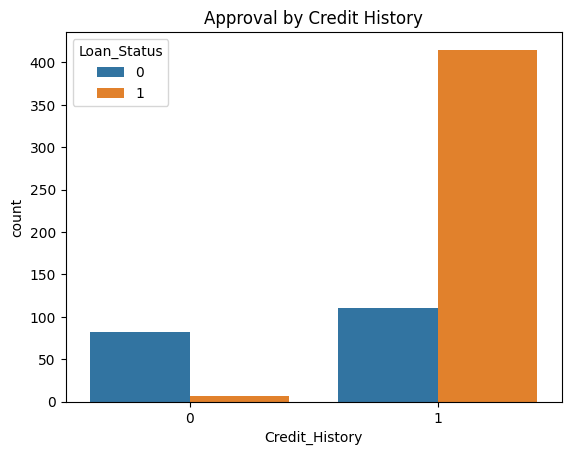

In [ ]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=loan_data)
plt.title('Approval by Credit History')

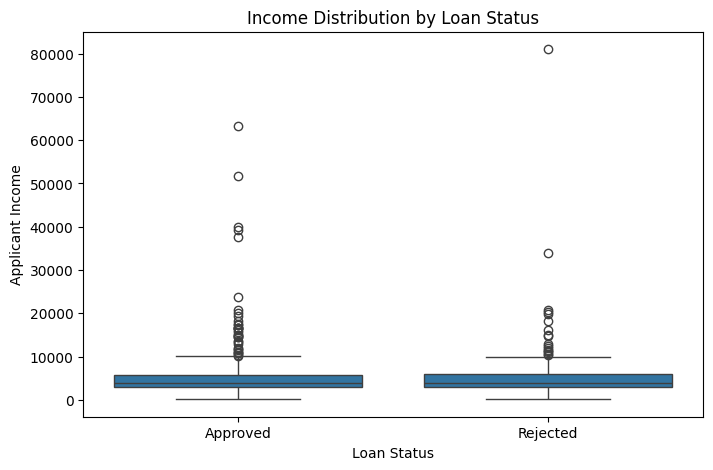

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=loan_data['Loan_Status'].map({0:'Rejected',1:'Approved'}), y=loan_data['ApplicantIncome'])
plt.title('Income Distribution by Loan Status')
plt.xlabel("Loan Status")
plt.ylabel("Applicant Income")
plt.show()

<Axes: xlabel='Gender_Male', ylabel='count'>

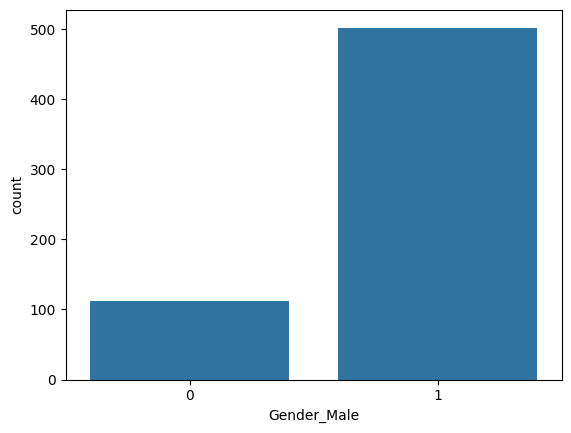

In [ ]:
sns.countplot(data=loan_data, x='Gender_Male')

Loan Approval is mostly affected by Credit history

I found a distribution that shows that income alone might not strongly affect whether a loan is approved or rejected.. Most people have similar income in both groups, though a few earn a lot more.

I'll advise the banks to consider loan some applicant that have a property in urban area.

In [ ]:
loan_data.to_csv('loan_data_cleaned.csv', index=False)

In [ ]:
!ls

loan_data_cleaned.csv  loandata.csv  sample_data


In [ ]:
from google.colab import files

In [ ]:
files.download('loan_data_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>